# MatPlotLib (for plotting figures and images)

In [66]:
import numpy as np 
import matplotlib.pyplot as plt

## Plotting images (2 D volumes)
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.imshow.html

In [67]:
vy,vx = np.mgrid[:128,:128]

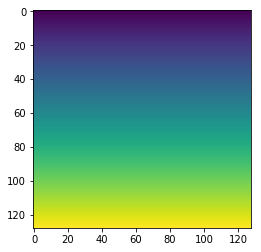

In [68]:
plt.imshow(vy)
plt.show() # this is only important in this jupyter environment

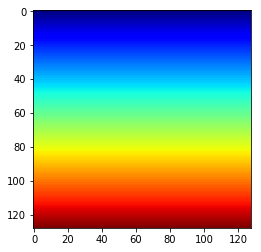

In [69]:
plt.imshow(vy,'jet')
plt.show()

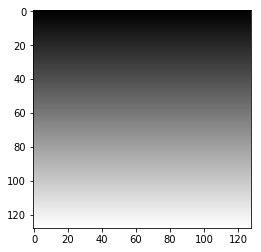

In [70]:
plt.imshow(vy,'gray')
plt.show()

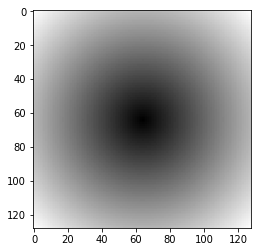

In [71]:
dist = ((vy-64)**2+(vx-64)**2)**0.5
plt.imshow(dist,'gray')
plt.show()

Real images are 3-dimensional matrices, the third dimension are the red, green, blue (and sometimes alpha) - channel 

In [72]:
colorsteps = np.linspace(0,1,128)
image = np.zeros((128,128,4))
image[:,:,0],image[:,:,1] = np.meshgrid(colorsteps,colorsteps)
image[:,:,2] = np.full((128,128),0.5)
image[:,:,3] = np.ones((128,128))

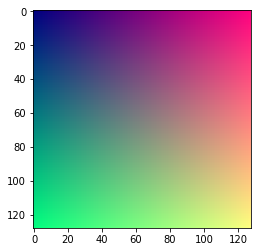

In [73]:
plt.imshow(image)
plt.show()

## Subplot-function: subplot(nrows,ncols,index)
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html

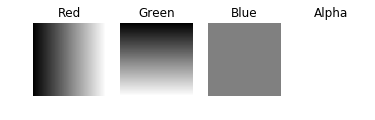

In [74]:
titles = ['Red','Green','Blue','Alpha']
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(image[:,:,i],'gray',vmin=0, vmax=1)
    plt.title(titles[i])
    plt.axis('off')
plt.show()

## Interpolation: 
https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html

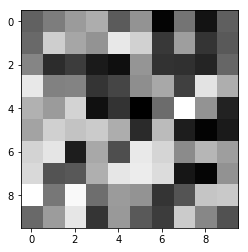

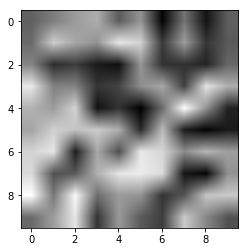

In [75]:
# create a random grayscale image (10x10 pixels)
n = 10
image = np.random.random((n,n))

#test 1:
plt.figure(0)
plt.imshow(image,'gray')
plt.show()

#test 2:
plt.figure(1)
plt.imshow(image,interpolation='bilinear',cmap='gray')
plt.show()

## 1-dimensional plots: plot(x)
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html

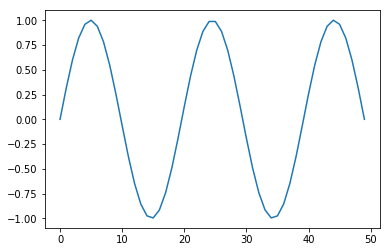

In [76]:
x = np.linspace(0,np.pi*5)
y = np.sin(x)
plt.plot(y)
plt.show()

add x-axis and labels

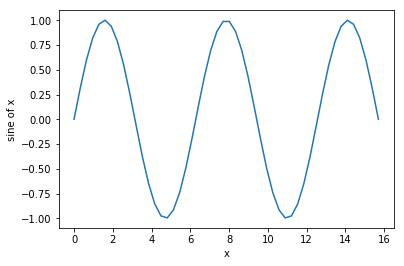

In [77]:
plt.plot(x,y)

plt.xlabel('x')
plt.ylabel('sine of x')
plt.show()

overlay 2 plots:

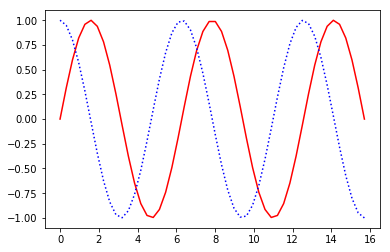

In [78]:
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1,'red')
plt.plot(x,y2,'blue',linestyle=':')
plt.show()

step-functions

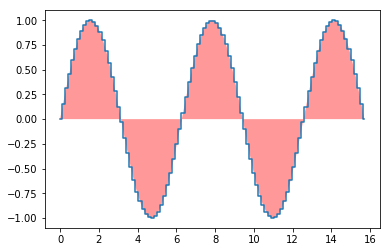

In [79]:
x = np.linspace(0,np.pi*5,100)
y = np.sin(x)

plt.figure(0)
ax = plt.plot(x,y,drawstyle='steps-mid')
plt.fill(x, y, 'r', alpha=0.4)

plt.show()

## 2D surface plots (X,Y -> Z):
more examples are here: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

In [80]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# here we imported only the function or subpackage "Axes3D" from the package "mplot3d" 

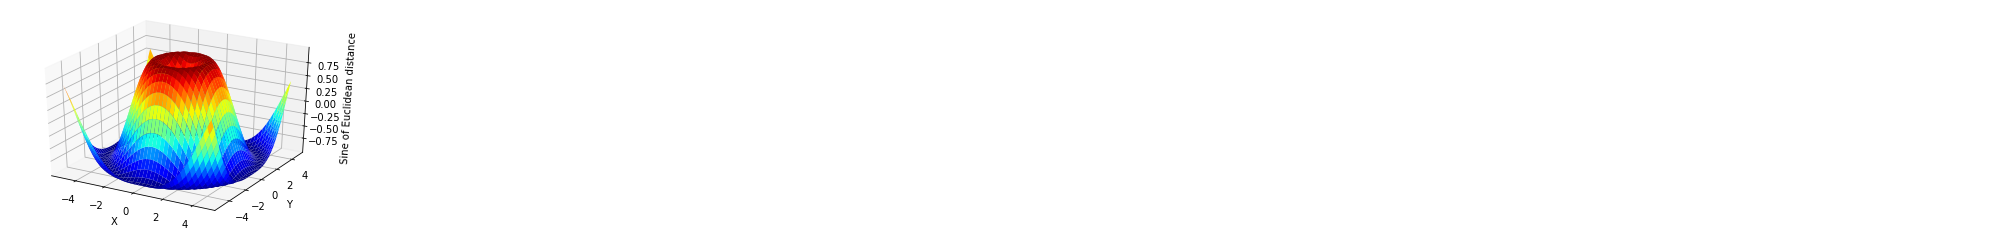

In [81]:
# define X and Y values:
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
# x.shape = y.shape = (15,)

# define some surface with shape (15,15) 
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)

# here comes the code for the plot: 
ax = plt.figure().gca(projection='3d')
ax.plot_surface(X,Y,Z,cmap='jet')

# labels (z-label can only be accessed via ax-object):
ax.set_zlabel('Sine of Euclidean distance')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

# ImageIO package: read and write images 
http://imageio.readthedocs.io/en/latest/standardimages.html

In [82]:
import imageio
# do not use aliases, 
# if the package is only used a few times in the code or 
# if the name is small enough (here only to open and to store an image)

we are working in float numbers [0,1] in image processing.

(300, 451, 3) uint8
(300, 451, 3) float64


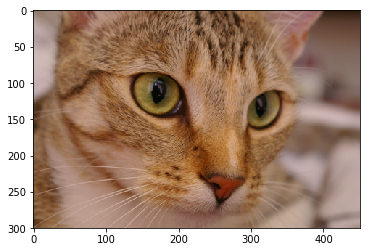

In [83]:
#load an image from the repository (so we can compare our programs in the class)
im = imageio.imread('imageio:chelsea.png')
print(im.shape,im.dtype)

# we are working in float numbers [0,1] in image processing:
im = np.clip(im /255.,0.,1.)
print(im.shape,im.dtype)

plt.imshow(im)
plt.show()

## Example gray-scale image (camera man),
Pay attention to change the colormap to 'gray' when plotting it ! 

(512, 512) float64


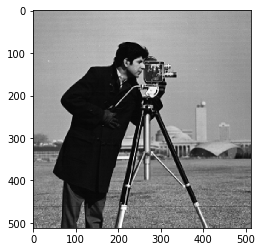

In [84]:
im = np.clip(imageio.imread('imageio:camera.png')/255.,0.,1.)
print(im.shape,im.dtype)
plt.imshow(im,'gray')
plt.show()

## Use own images from local folder

(128, 128, 4) float64


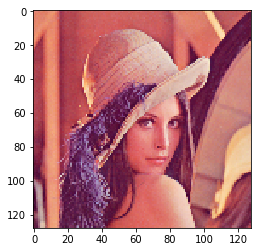

In [85]:
im = np.clip(imageio.imread('lena128C.png')/255.,0.,1.)
print(im.shape,im.dtype)
plt.imshow(im)
plt.show()

## make some fool processing and store image

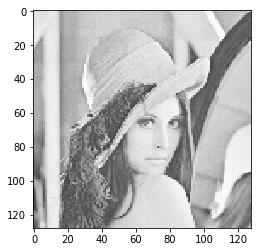

In [86]:
im = np.clip(imageio.imread('lena128C.png')/255.,0,1)

# do stuff, for instance map red channels
im = im[:,:,[0,0,0,3]]
plt.imshow(im)
plt.show()

# to store we generally have to transform the images back to integer
imageio.imwrite('myImage.png',np.clip(im*255,0,255).astype(np.uint8))